# Example

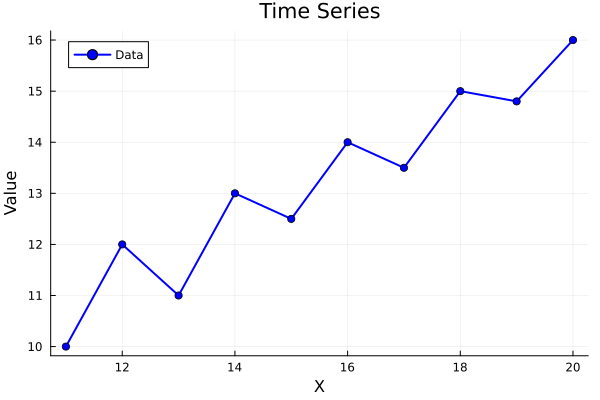

In [41]:
import Plots
using TimeSeriesKit

ts = TimeSeries(collect(11:20), [10.0, 12.0, 11.0, 13.0, 12.5, 14.0, 13.5, 15.0, 14.8, 16.0])
plot_timeseries(ts)

# Linear Regression

Is fitted? true
X Out of Sample: [21, 22, 23]
Y Out of Sample: [16.399999999999984, 16.985454545454527, 17.57090909090907]


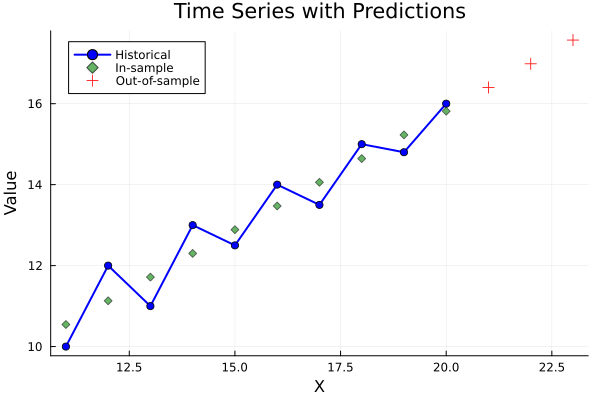

In [42]:
# Fit a linear model
model_linear = LinearModel()
fit(model_linear, ts)

println("Is fitted? $(is_fitted(model_linear))")

# Or predict at specific x values
future_x = extrapolate_timestamps(ts, 3)
in_sample = predict(model_linear, ts.timestamps)
out_of_sample = predict(model_linear, future_x)
println("X Out of Sample: $(out_of_sample.timestamps)")
println("Y Out of Sample: $(out_of_sample.values)")

# Plot the forecast with predictions (TimeSeries)
plot_timeseries(ts, in_sample, out_of_sample)

### Iterative training 

Is fitted? true
X values: [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Y Out of Sample: [13.999999999999877, 11.99999999999996, 13.500000000000007, 13.50000000000001, 14.433333333333334, 14.571428571428564, 15.357142857142854, 15.716666666666669, 16.399999999999984, 16.985454545454527, 17.57090909090907]


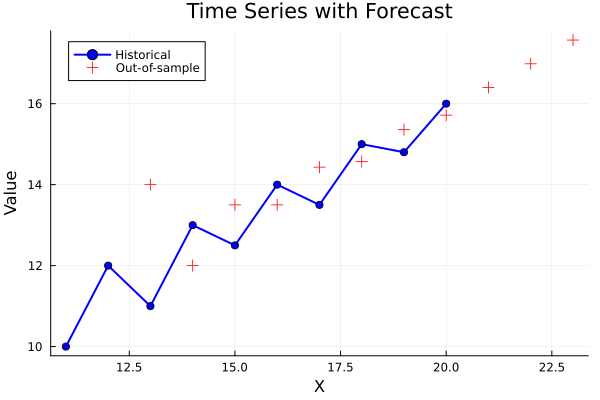

In [43]:

# Fit a linear model
model_linear = LinearModel()
fit(model_linear, ts)

println("Is fitted? $(is_fitted(model_linear))")

# Or predict at specific x values
future_x = extrapolate_timestamps(ts, 3)
out_of_sample = iterative_predict(model_linear, ts, 3)
println("X values: $(out_of_sample.timestamps)")
println("Y Out of Sample: $(out_of_sample.values)")

# Plot the forecast with predictions (TimeSeries)
plot_timeseries(ts, out_of_sample)

# Simple Exponential Smoothing

Optimized alpha: 0.77


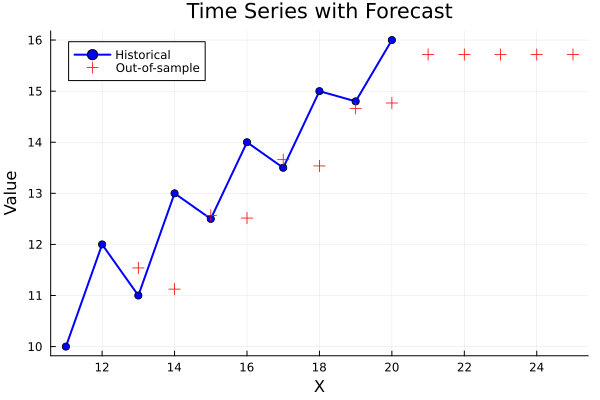

In [44]:
# Example with SES model

# Fit SES model (alpha will be optimized)
model_ses = SESModel()
fit(model_ses, ts)

println("Optimized alpha: ", model_ses.alpha)

# Forecast
predicted_ses = iterative_predict(model_ses, ts, 5)

# Plot
plot_timeseries(ts, predicted_ses)

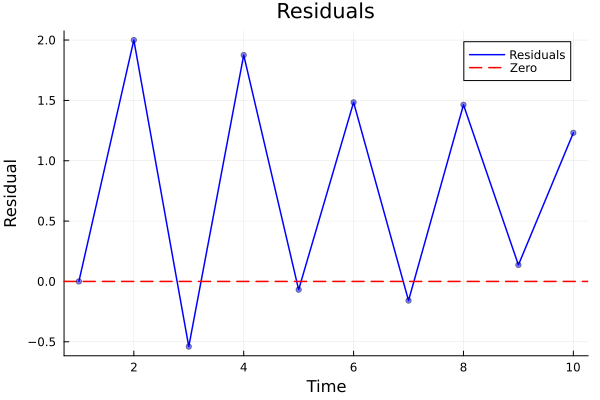

In [45]:
# Plot residuals
plot_residuals(model_ses)

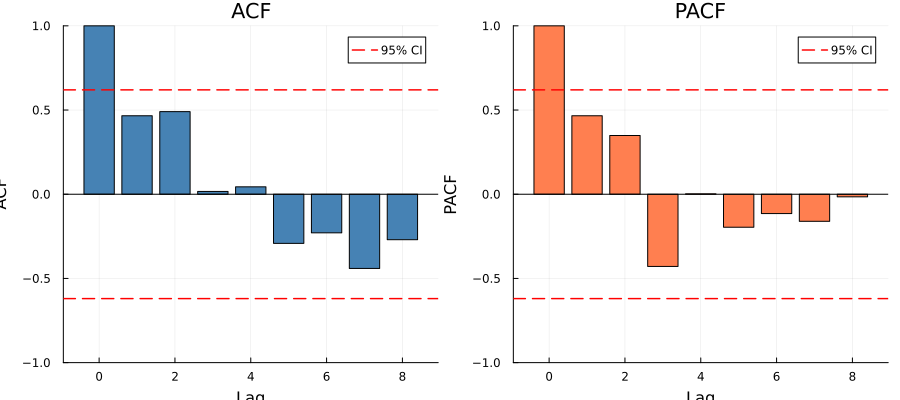

In [50]:
# Plot ACF
plot_ac(ts, max_lag=8)